<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.706345,37.696236,81.240678,86.507516,28.393306,340.544080,302.940193,37.603888
1,0.0,1.0,61.868662,62.557358,74.117918,90.390518,-17.297045,281.637412,268.886165,12.751246
2,0.0,2.0,88.559482,72.462171,46.594889,35.096249,-34.831873,217.880918,215.062628,2.818290
3,0.0,3.0,35.843479,22.629397,51.045287,99.377174,-20.186769,198.708569,251.331313,-52.622744
4,0.0,4.0,62.892817,30.953859,79.098710,43.787776,24.529403,251.262565,254.203108,-2.940543
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,89.225239,25.019848,30.723297,49.249986,14.480528,218.698897,239.595623,-20.896726
19996,999.0,16.0,67.223470,30.283158,97.073148,55.405069,66.269971,326.254816,303.763411,22.491405
19997,999.0,17.0,49.608676,55.686827,74.012634,97.516091,98.244065,385.068293,276.012861,109.055432
19998,999.0,18.0,37.043110,75.658006,26.558407,55.535882,-2.730418,202.064986,175.935268,26.129719


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.706345  37.696236  81.240678  86.507516  28.393306   
      1.0    61.868662  62.557358  74.117918  90.390518 -17.297045   
      2.0    88.559482  72.462171  46.594889  35.096249 -34.831873   
      3.0    35.843479  22.629397  51.045287  99.377174 -20.186769   
      4.0    62.892817  30.953859  79.098710  43.787776  24.529403   
...                ...        ...        ...        ...        ...   
999.0 15.0   89.225239  25.019848  30.723297  49.249986  14.480528   
      16.0   67.223470  30.283158  97.073148  55.405069  66.269971   
      17.0   49.608676  55.686827  74.012634  97.516091  98.244065   
      18.0   37.043110  75.658006  26.558407  55.535882  -2.730418   
      19.0   82.913086  47.008873  22.038581  69.435659  19.420310   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    340.544080  302.940193   37.603888  
      1.0    281.637412  268.886165   12.751246  
      2.0    217.880918  215.062628    2.818290  
      3.0    198.708569  251.331313  -52.622744  
      4.0    251.262565  254.203108   -2.940543  
...                 ...         ...         ...  
999.0 15.0   218.698897  239.595623  -20.896726  
      16.0   326.254816  303.763411   22.491405  
      17.0   385.068293  276.012861  109.055432  
      18.0   202.064986  175.935268   26.129719  
      19.0   250.816508  237.806837   13.009671  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.706345  37.696236  81.240678  86.507516  28.393306   
      1.0    61.868662  62.557358  74.117918  90.390518 -17.297045   
      2.0    88.559482  72.462171  46.594889  35.096249 -34.831873   
      3.0    35.843479  22.629397  51.045287  99.377174 -20.186769   
      4.0    62.892817  30.953859  79.098710  43.787776  24.529403   
...                ...        ...        ...        ...        ...   
999.0 15.0   89.225239  25.019848  30.723297  49.249986  14.480528   
      16.0   67.223470  30.283158  97.073148  55.405069  66.269971   
      17.0   49.608676  55.686827  74.012634  97.516091  98.244065   
      18.0   37.043110  75.658006  26.558407  55.535882  -2.730418   
      19.0   82.913086  47.008873  22.038581  69.435659  19.420310   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    340.544080  302.940193   37.603888  
      1.0    281.637412  268.886165   12.751246  
      2.0    217.880918  215.062628    2.818290  
      3.0    198.708569  251.331313  -52.622744  
      4.0    251.262565  254.203108   -2.940543  
...                 ...         ...         ...  
999.0 15.0   218.698897  239.595623  -20.896726  
      16.0   326.254816  303.763411   22.491405  
      17.0   385.068293  276.012861  109.055432  
      18.0   202.064986  175.935268   26.129719  
      19.0   250.816508  237.806837   13.009671  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.706345,37.696236,81.240678,86.507516,28.393306,340.544080,302.940193,37.603888
1,0.0,1.0,61.868662,62.557358,74.117918,90.390518,-17.297045,281.637412,268.886165,12.751246
2,0.0,2.0,88.559482,72.462171,46.594889,35.096249,-34.831873,217.880918,215.062628,2.818290
3,0.0,3.0,35.843479,22.629397,51.045287,99.377174,-20.186769,198.708569,251.331313,-52.622744
4,0.0,4.0,62.892817,30.953859,79.098710,43.787776,24.529403,251.262565,254.203108,-2.940543
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,89.225239,25.019848,30.723297,49.249986,14.480528,218.698897,239.595623,-20.896726
19996,999.0,16.0,67.223470,30.283158,97.073148,55.405069,66.269971,326.254816,303.763411,22.491405
19997,999.0,17.0,49.608676,55.686827,74.012634,97.516091,98.244065,385.068293,276.012861,109.055432
19998,999.0,18.0,37.043110,75.658006,26.558407,55.535882,-2.730418,202.064986,175.935268,26.129719


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.706345  37.696236  81.240678  86.507516  28.393306   
      1.0    61.868662  62.557358  74.117918  90.390518 -17.297045   
      2.0    88.559482  72.462171  46.594889  35.096249 -34.831873   
      3.0    35.843479  22.629397  51.045287  99.377174 -20.186769   
      4.0    62.892817  30.953859  79.098710  43.787776  24.529403   
...                ...        ...        ...        ...        ...   
999.0 15.0   89.225239  25.019848  30.723297  49.249986  14.480528   
      16.0   67.223470  30.283158  97.073148  55.405069  66.269971   
      17.0   49.608676  55.686827  74.012634  97.516091  98.244065   
      18.0   37.043110  75.658006  26.558407  55.535882  -2.730418   
      19.0   82.913086  47.008873  22.038581  69.435659  19.420310   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    340.544080  302.940193   37.603888  
      1.0    281.637412  268.886165   12.751246  
      2.0    217.880918  215.062628    2.818290  
      3.0    198.708569  251.331313  -52.622744  
      4.0    251.262565  254.203108   -2.940543  
...                 ...         ...         ...  
999.0 15.0   218.698897  239.595623  -20.896726  
      16.0   326.254816  303.763411   22.491405  
      17.0   385.068293  276.012861  109.055432  
      18.0   202.064986  175.935268   26.129719  
      19.0   250.816508  237.806837   13.009671  

[20000 rows x 8 columns]

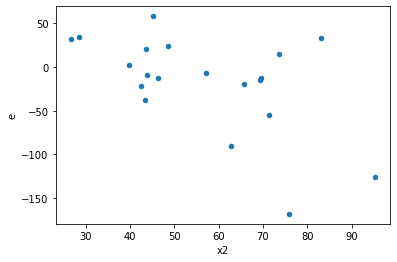

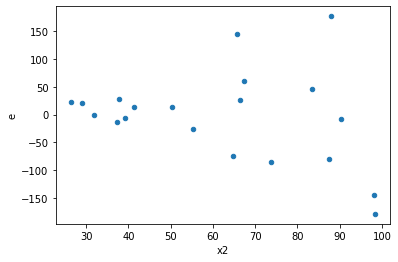

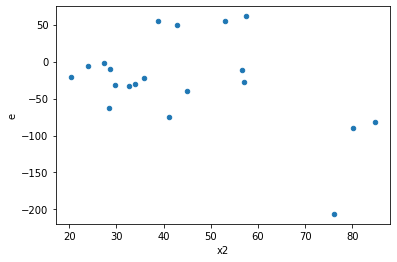

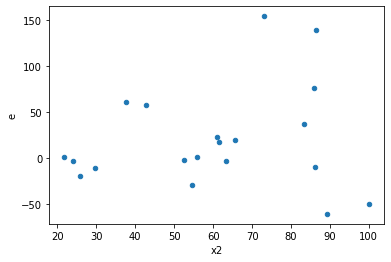

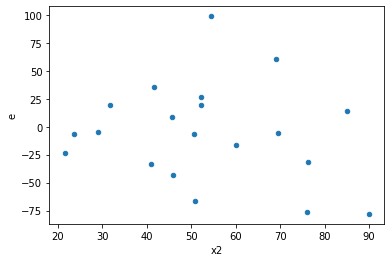

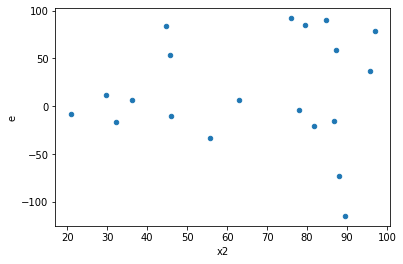

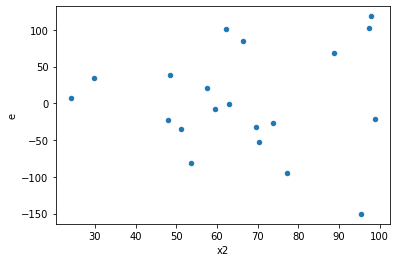

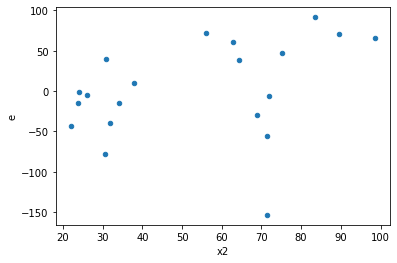

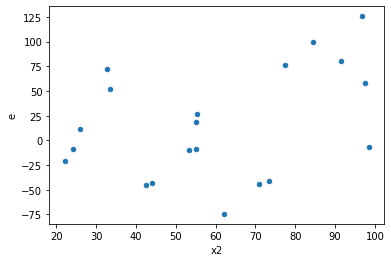

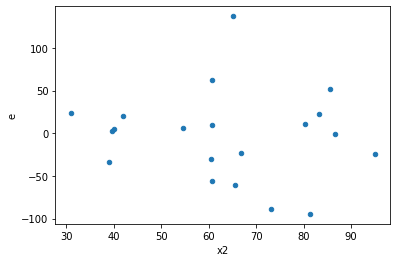

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,3.0,14046.937291472988,16985.63991587184,1560.7708101636654,5661.879971957281,3.627617799543269,0.31682521814166775,0.8415873909291661,0.15841260907083388,Reject005=1 : Homoscedasticity
2.0,8.0,4.0,6974.164776713288,37977.90423074957,871.770597089161,9494.476057687392,10.891025792094176,0.03526124281450049,0.9823693785927498,0.017630621407250247,Reject005=0 : Heteroscedasticity
3.0,1.0,11.0,3.554291694563791e-25,15636.907453452051,3.554291694563791e-25,1421.5370412229138,3.999494592402539e+27,0.0,1.0,0.0,Reject005=0 : Heteroscedasticity
5.0,7.0,5.0,28700.140202276016,27318.64772959723,4100.020028896573,5463.729545919446,1.3326104524884195,0.7775418111706769,0.6112290944146616,0.38877090558533844,Reject005=1 : Homoscedasticity
8.0,5.0,7.0,11967.815137806818,50523.87413527271,2393.5630275613635,7217.696305038959,3.0154611438799557,0.18255330588069985,0.9087233470596501,0.09127665294034992,Reject005=1 : Homoscedasticity
9.0,8.0,4.0,18662.448008508924,14384.544280684298,2332.8060010636154,3596.1360701710746,1.5415495624288769,0.7129120172098542,0.6435439913950729,0.3564560086049271,Reject005=1 : Homoscedasticity
11.0,8.0,4.0,14494.874598458688,10090.240147061711,1811.859324807336,2522.560036765428,1.392249388364444,0.7943897541746074,0.6028051229126963,0.3971948770873037,Reject005=1 : Homoscedasticity
12.0,8.0,4.0,19246.514696656257,10652.442976601535,2405.814337082032,2663.1107441503837,1.1069477403565653,0.9891899491864311,0.5054050254067844,0.49459497459321555,Reject005=1 : Homoscedasticity
13.0,4.0,8.0,706.6949030807549,24871.38175798164,176.67372577018872,3108.922719747705,17.596972646581797,0.0009962641598468824,0.9995018679200766,0.0004981320799234412,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,1.0,24591.590346667883,3.9056011168287437e-23,2235.599122424353,3.9056011168287437e-23,1.7470042270339543e-26,5.403726683322189e-137,Reject005=0 : Heteroscedasticity
1.0,9.0,3.0,14046.937291472988,16985.63991587184,1560.7708101636654,5661.879971957281,3.627617799543269,0.31682521814166775,Reject005=1 : Homoscedasticity
2.0,8.0,4.0,6974.164776713288,37977.90423074957,871.770597089161,9494.476057687392,10.891025792094176,0.03526124281450049,Reject005=0 : Heteroscedasticity
3.0,1.0,11.0,3.554291694563791e-25,15636.907453452051,3.554291694563791e-25,1421.5370412229138,3.999494592402539e+27,0.0,Reject005=0 : Heteroscedasticity
4.0,6.0,6.0,10298.199973803878,4619.951278579787,1716.3666623006463,769.9918797632978,0.44861735937657277,0.352258769037135,Reject005=1 : Homoscedasticity
5.0,7.0,5.0,28700.140202276016,27318.64772959723,4100.020028896573,5463.729545919446,1.3326104524884195,0.7775418111706769,Reject005=1 : Homoscedasticity
6.0,12.0,1.0,37473.76738141039,7.270142102516845e-27,3122.813948450866,7.270142102516845e-27,2.328074045565008e-30,2.1449157098984792e-172,Reject005=0 : Heteroscedasticity
7.0,9.0,3.0,15133.421988284446,1199.1125528831994,1681.4913320316052,399.7041842943998,0.23770814435984675,0.08130344153480883,Reject005=1 : Homoscedasticity
8.0,5.0,7.0,11967.815137806818,50523.87413527271,2393.5630275613635,7217.696305038959,3.0154611438799557,0.18255330588069985,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      664
Reject005=0 : Heteroscedasticity    336
Name: Result_test, dtype: int64